# Customer Analysis Final Round

Goal: To predict the Total Claim Amount

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

Getting Data

In [498]:
data = pd.read_csv('fri_15\lab-customer-analysis-final-round/marketing_customer_analysis.csv')

#### Cleaning/Wrangling/EDA 
Change headers names.

Deal with NaN values.

Categorical Features.

Numerical Features.

Exploration.

In [499]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [500]:
#Update header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols
data.columns = data.columns.str.replace(' ', '_') 
data.rename(columns = {'employmentstatus':'employment_status'}, inplace = True)
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [501]:
#check for NaN values
round(data.isna().sum()/len(data),4)*100 

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employment_status                0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [502]:
#no NaN values so no further cleaning needed

In [503]:
data_num =  data._get_numeric_data() #separate out the numeric columns
data_num.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [504]:
data_num.head() #check numerical columns

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


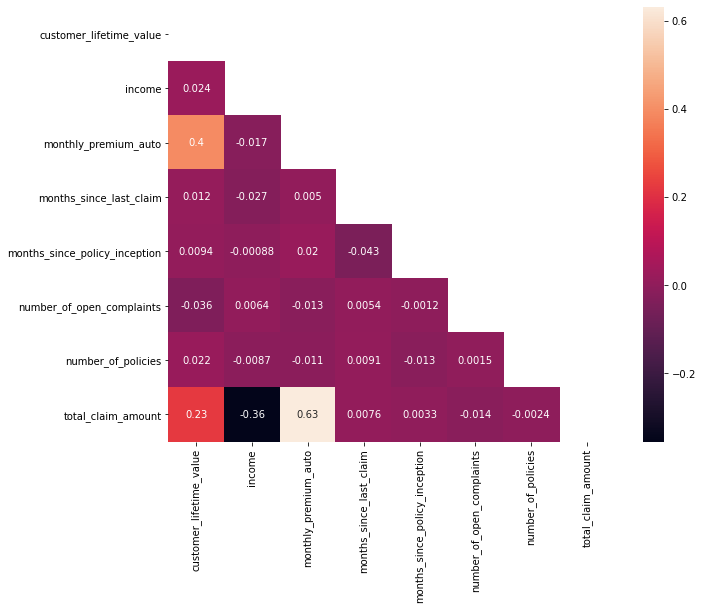

In [506]:
#check for multicollinearity in numerical columns

correlations_matrix = data_num.corr()
mask = np.zeros_like(correlations_matrix) #masking because it's symmetrical
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [507]:
#No multicollinearity

#### Processing Data
Dealing with outliers.

Normalization.

Encoding Categorical Data.

Splitting into train set and test set.

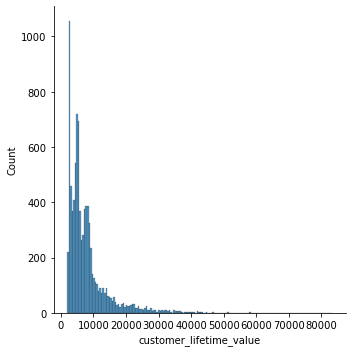

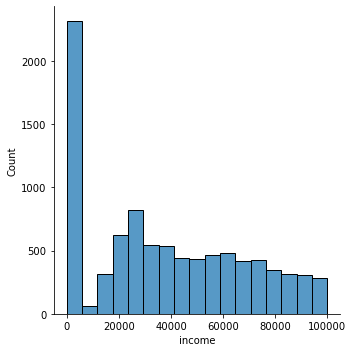

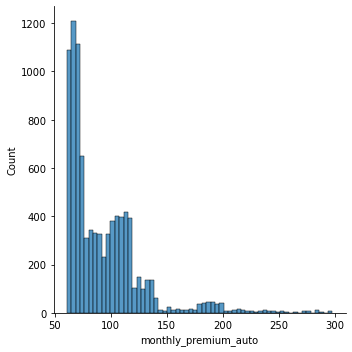

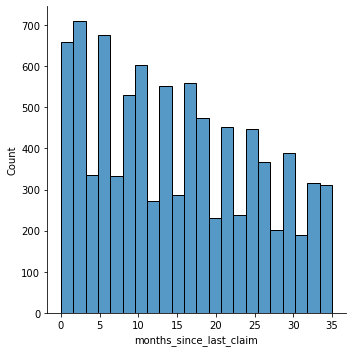

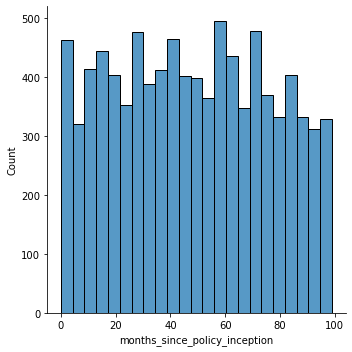

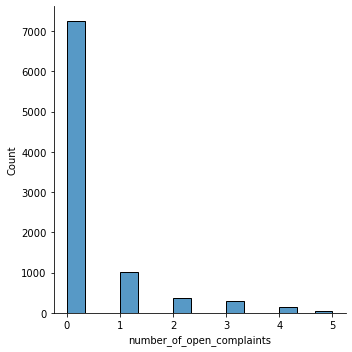

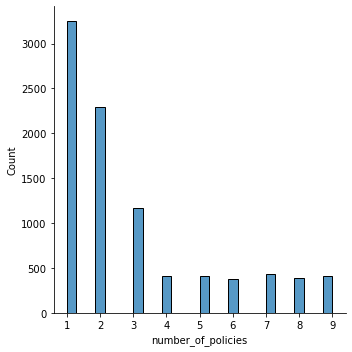

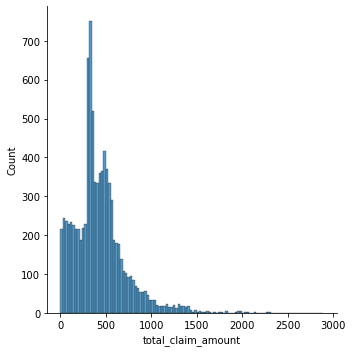

In [508]:
#Check distributions of numerical columns
for x in data_num.columns:
    sns.displot(data_num[x])
plt.show()

<AxesSubplot:xlabel='customer_lifetime_value'>

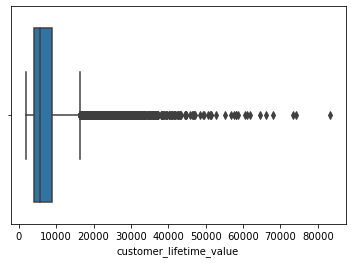

In [509]:
#improve customer_lifetime_value

sns.boxplot(x=data['customer_lifetime_value'])

In [510]:
#define iqr and upper and lower limits then drop values outside the limits to remove outliers
iqr_clv = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit_clv = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr_clv
lower_limit_clv = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr_clv

data = data[(data['customer_lifetime_value']>lower_limit_clv) & (data['customer_lifetime_value']<upper_limit_clv)]

<AxesSubplot:xlabel='customer_lifetime_value'>

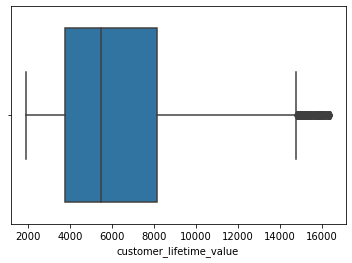

In [511]:
#check new distribution

sns.boxplot(x=data['customer_lifetime_value'])

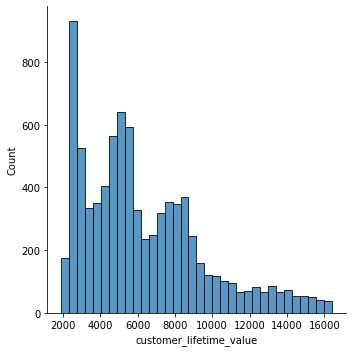

In [512]:
#now check shape of distribution

sns.displot(x=data['customer_lifetime_value'])

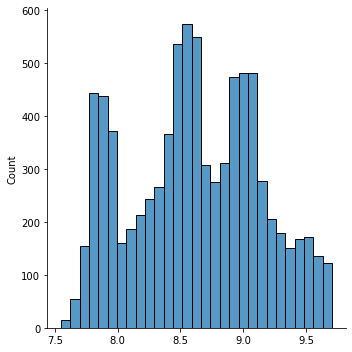

In [513]:
#try log transformation

def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
CLV_log = list(map(log_transform_clean, data['customer_lifetime_value']))
sns.displot(CLV_log)
plt.show()

In [514]:
#doesn't look very good. Try Boxcox transformation
#check for values <0

len(data[data['customer_lifetime_value']<=0])

0

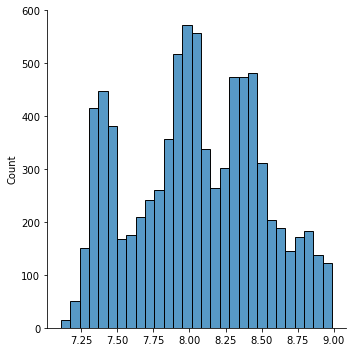

In [515]:
from scipy import stats
clv_b, lmbda = stats.boxcox(data['customer_lifetime_value'])
sns.displot(clv_b)
plt.show()

In [516]:
#very similar to log transformation. Both are better than the original so use log transformation
data['customer_lifetime_value_log'] = CLV_log

In [517]:
data = data.drop(["customer_lifetime_value"], axis=1)

<AxesSubplot:xlabel='monthly_premium_auto'>

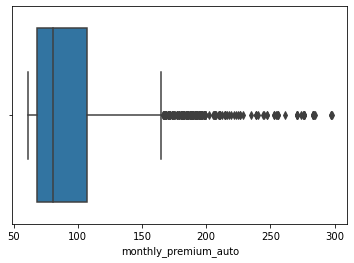

In [518]:
#same process for monthly_premium_auto

sns.boxplot(x=data['monthly_premium_auto'])

In [519]:
#define iqr and upper and lower limits then drop values outside the limits to remove outliers
iqr_mpa = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)
upper_limit_mpa = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr_mpa
lower_limit_mpa = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr_mpa

data = data[(data['monthly_premium_auto']>lower_limit_mpa) & (data['monthly_premium_auto']<upper_limit_mpa)]

<AxesSubplot:xlabel='monthly_premium_auto'>

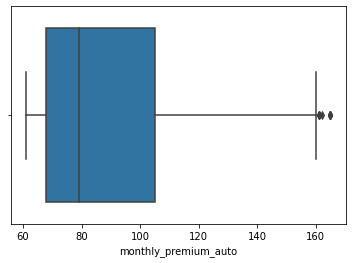

In [520]:
#check to see new distribution
sns.boxplot(x=data['monthly_premium_auto'])

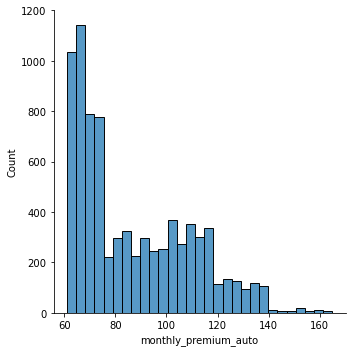

In [521]:
#now check shape of distribution

sns.displot(x=data['monthly_premium_auto'])

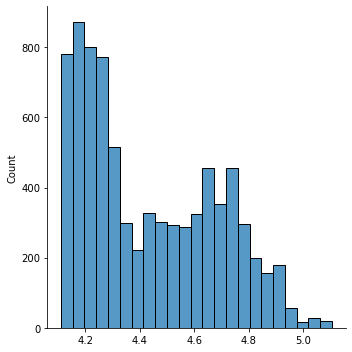

In [522]:
#try log transformation

def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
mpa_log = list(map(log_transform_clean, data['monthly_premium_auto']))
sns.displot(mpa_log)
plt.show()

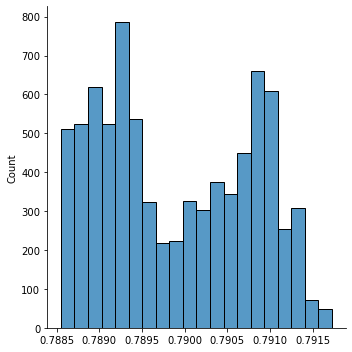

In [523]:
#try boxcox
from scipy import stats
mpa_b, lmbda = stats.boxcox(data['monthly_premium_auto'])
sns.displot(mpa_b)
plt.show()

In [524]:
#use boxcox transformation

data['monthly_premium_auto_bc'] = mpa_b

In [525]:
data = data.drop(["monthly_premium_auto"], axis=1)

In [526]:
#income column - replace 0s with mean value 
data["income"].replace(0,data["income"].mean(axis=0),inplace=True)
       
        

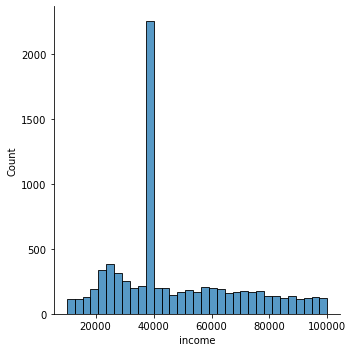

In [527]:
sns.displot(x=data['income'])

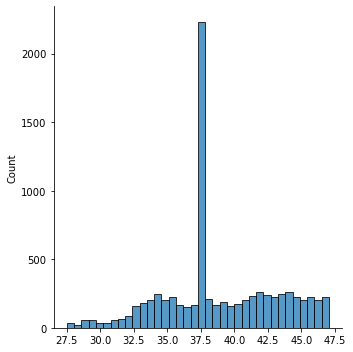

In [528]:
inc_b, lmbda = stats.boxcox(data['income'])
sns.displot(inc_b)
plt.show()

In [529]:
data['income_bc'] = inc_b #use boxcox of incomes
data = data.drop(["income"], axis=1)

In [579]:
#remove Y from data

Y = data['total_claim_amount']
data = data.drop(["total_claim_amount"], axis=1)

In [581]:
data_num =  data._get_numeric_data() #update numeric values
data_num.head()


,months_since_last_claim,months_since_policy_inception,number_of_policies,customer_lifetime_value_log,monthly_premium_auto_bc,income_bc
0,32,5,1,7.924260,0.789189,41.268837
1,13,42,8,8.850738,0.790417,37.615575
2,18,38,2,9.464008,0.790831,39.929862
3,18,65,7,8.941920,0.790780,37.615575
4,12,44,1,7.942253,0.789450,38.958279


In [582]:
#Normalize numerical columns

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_num)   #fit(x_num) gives the mean and stdev for the column so the columns can be transformed to a standard normal distribution
num_normalized = transformer.transform(data_num)

In [583]:
#check categorical columns
data_cat = data.drop(data_num, axis=1)
data_cat.head()



,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [584]:
#drop customer and effective_to_date

data_cat = data_cat.drop(["customer","effective_to_date"], axis=1)

In [585]:
data_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [586]:
#get overview of values in each column
for col in data_cat:
    print(data_cat[col].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Sports Car']
['Medsize' 'Small' 'Large']


In [587]:
#consolidate policy categories

def clean_policy(x):
    if x.startswith('C'):
        return 'Corporate'
    elif x.startswith('P'):
        return 'Personal'
    else:
        return 'Special'
data_cat['policy'] = list(map(clean_policy, data['policy'])) 

In [588]:
#reduce number of states by combining Arizona and Nevada as "Central region"

def clean_states(x):
     if x=="Arizona" or x=="Nevada":
        return 'Central'
     else:
        return x
data_cat['state'] = list(map(clean_states, data['state'])) 
    

In [589]:
for col in data_cat:
    print(data_cat[col].unique())

['Washington' 'Central' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate' 'Personal' 'Special']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Sports Car']
['Medsize' 'Small' 'Large']


In [590]:
pd.get_dummies(data_cat, drop_first=True)

,state_Central,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9130,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9131,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9132,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [591]:
#Apply Onehotencoder to categorical columns

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data_cat) #fit finds the necessary parameters
cat_encoded = encoder.transform(data_cat).toarray()

In [592]:
#combine categorical and numerical data
X = np.concatenate((num_normalized, cat_encoded), axis=1) 


In [593]:
#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100) 

#### Modeling
Apply model.
#### Model Validation
R2.

MSE.

RMSE.

MAE.

In [594]:
#fit model and check R2 value
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2=r2_score(y_test, predictions) #compare test outcomes with the real values
print ("R squared:", r2)

R squared: 0.7295423316063572


In [595]:
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print ("Adjusted R squared:", adj_r2)

Adjusted R squared: 0.726125304842066


In [596]:
import math
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

MSE: 14722.610987354248
RMSE: 121.3367668406994


In [603]:
mae=mean_absolute_error(y_test, predictions)
print ("MAE:", mae)

MAE: 87.01858149598644


#### Reporting
Present results.

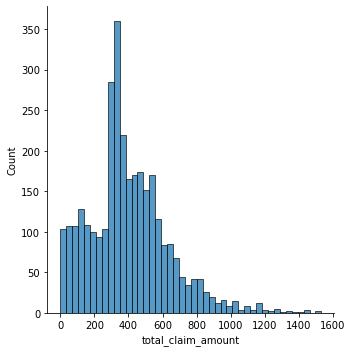

In [597]:
sns.displot(y_test)
plt.show()

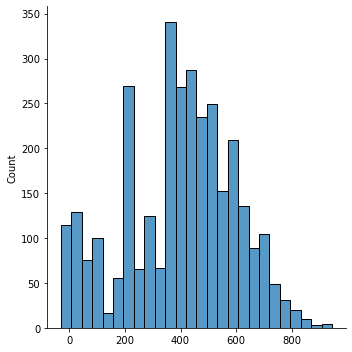

In [598]:
sns.displot(predictions)
plt.show()